# Perustulo
Antti Tanskanen,
1.4.2020

Tässä työkirjassa käytetään fin_benefits-kirjastosta muokattua versiota, jossa on toteutettu erilaisia perustulomalleja. Tavoitteena on arvioida perustulon vaikutusta työnteon kannusteisiin.

Perustulomalli perustuu Eduskunnan sisäisen laskentapalvelun Vihreille tekemään laskentaan.

Perustulon oletetaan korvaavan työmarkkinatuen ja peruspäivärahan perusosat sekä kotihoidontuen ja opintotuen. Samoin verotusta muutetaan vastaavasti kuin Eduskunnan laskentapalvelun laskelmassa. Toimeentulotuki, ansiosidonnainen työttömyysturva ja työmarkkinatuen lapsikorotukset säilyvät mallissa, samoin kuin asumistuki. Perustulo huomioidaan kuitenkin näiden osana.

## Python-kirjasto

Perustulo on toteutettu Python-kirjastossa fin_benefit.

In [1]:
# for Colab, install fin_benefits from Github
#!pip install git+https://github.com/ajtanskanen/benefits.git

In [2]:
# haetaan tarpeelliset kirjastot
import fin_benefits # määrittelee luokan, jossa on sosiaaliturvafunktiot yms
import numpy as np 

# kuvat suuremmiksi
import matplotlib.pyplot as plt


In [14]:
plt.rcParams['figure.figsize'] = [10, 5]

## Nykytila

Laskee työllisyysveroaste, työnteon efektiivisen marginaalivero ja käteen jäävä ansio kirjaston avulla. Valitaan ensin tyyppitapaus. Muuttuja p kertoo tarkat tiedot laskennankohteesta, selite sisältää kuvauksen siitä ja parametri tulosta kehottaa printtaamaan selite:en.

In [4]:
p,selite=fin_benefits.perheparametrit(perhetyyppi=2,tulosta=True)

Perhe, jossa 1 aikuinen, ei lapsia. Työtön (ansiopaivaraha, vakiintunut ansio 2500 e/kk), ei puolisoa. Asumismenot asumistuessa 440 e/kk


In [5]:
#fin_benefits.print_examples()
p['vakiintunutpalkka']=1500

Tarkastetaan vielä, millaisia parametrejä p:hen on syötetty

Itse laskenta koostuu kahdesta rivistä koodia. Alustetaan objektia ben kirjastosta fin_benefits. Tämän jälkeen sitä voi kutsua laskemaan marginaalit ja plottamaan ne.

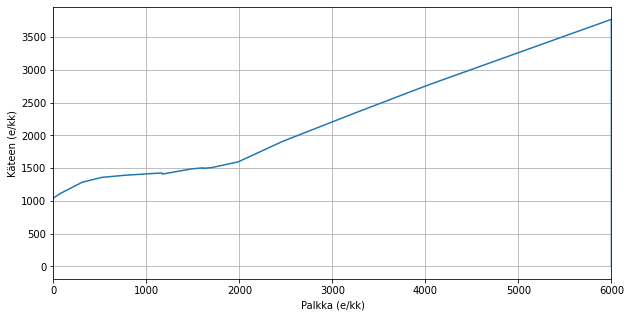

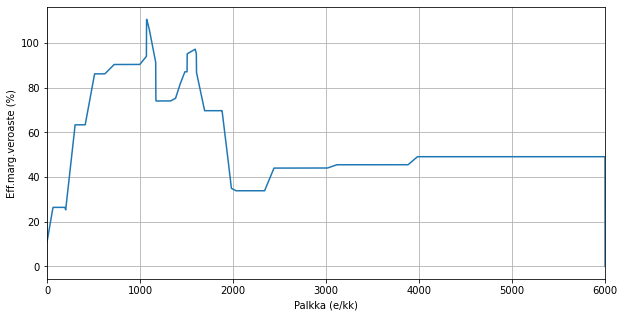

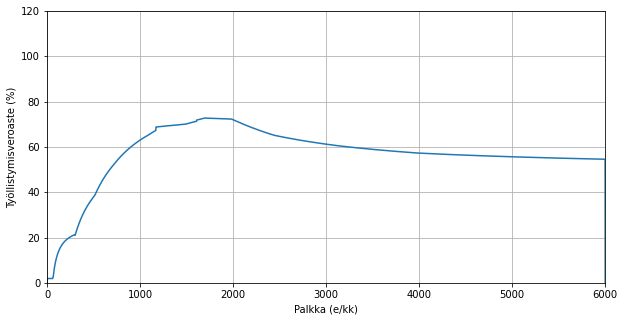

In [6]:
# Luokka Benefits() sisältää koodin
baseline_ben=fin_benefits.Benefits()
baseline_ben.set_year(2018)

# ja lasketaan & plotataan tulokset
basenetto,baseeff,basetva=baseline_ben.laske_ja_plottaa(p)

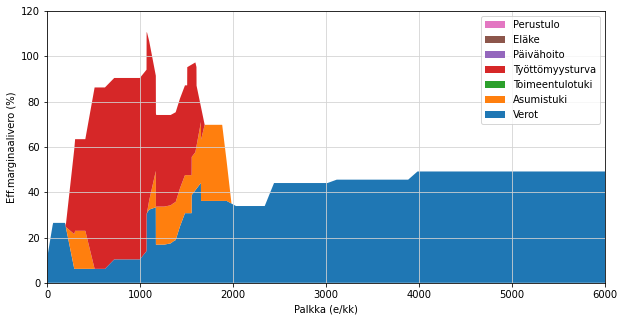

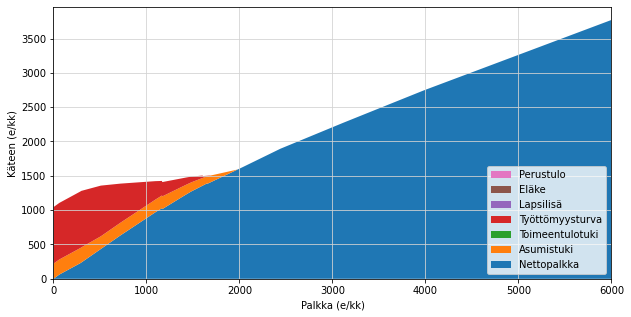

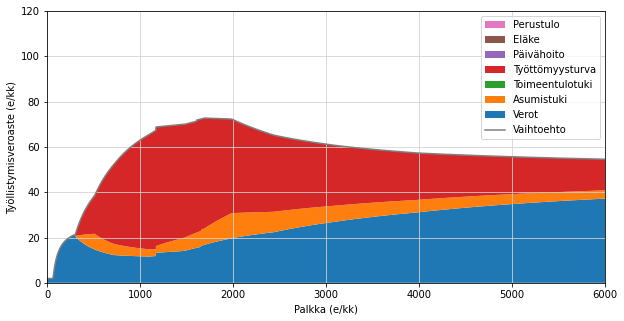

In [7]:
# ja lasketaan & plotataan tulokset
baseline_ben.laske_ja_plottaa_marginaalit(p)

## Perustulo

Perustulomalli Kela


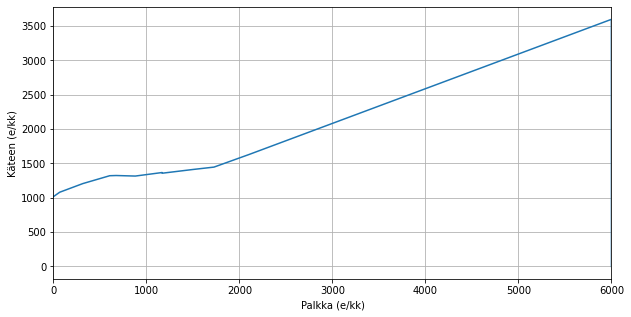

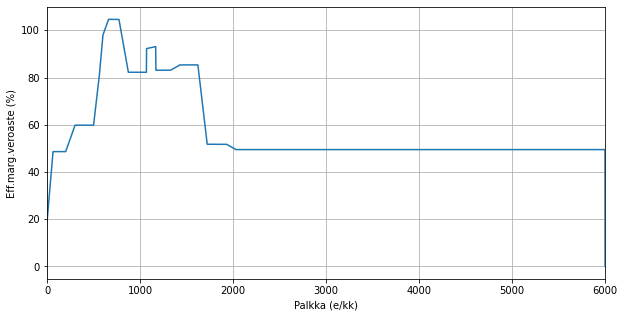

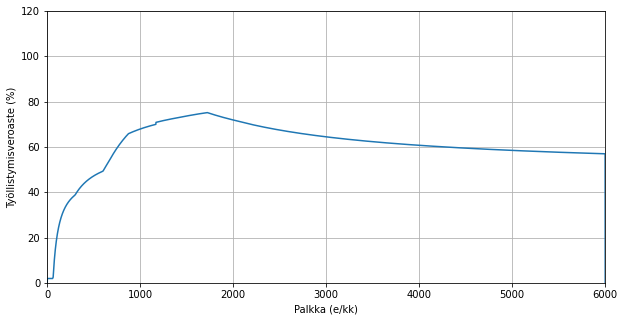

In [15]:
# Luokka Benefits() sisältää koodin
kw={'perustulomalli':'Kela'}
ben=fin_benefits.BasicIncomeBenefits(kwargs=kw)
ben.set_year(2018)


# ja lasketaan & plotataan tulokset
bi_netto,bi_eff,bi_tva=ben.laske_ja_plottaa(p)

Jaotellaan vielä marginaalit niiden lähteiden mukaan. Nettopalkka sisältää kaikkien talouden aikuisten nettopalkat, kun taas vaaka-akselin Palkka tarkoittaa työllistyvän palkkaa.

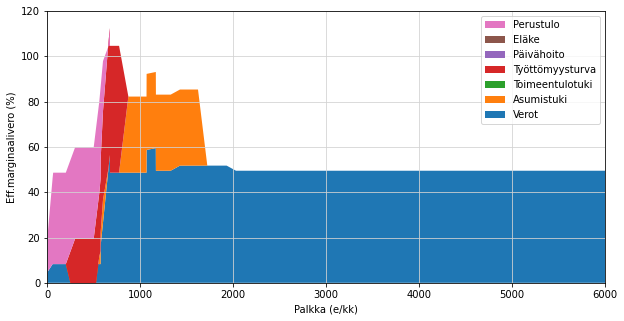

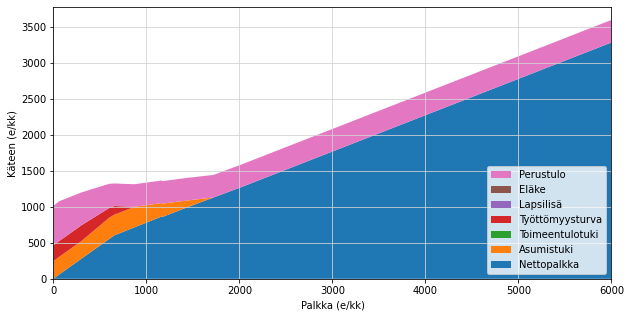

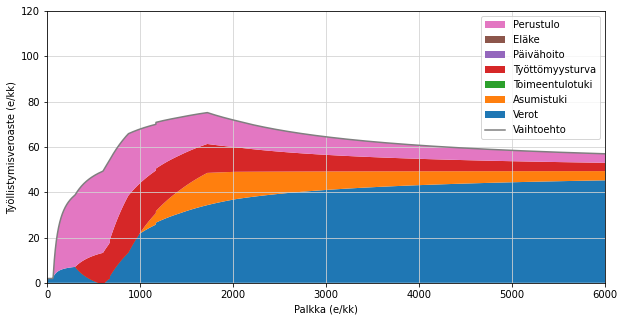

In [16]:
# ja lasketaan & plotataan tulokset
ben.laske_ja_plottaa_marginaalit(p,incl_perustulo=True,incl_elake=True)

# Nykytilan ja perustulon vertailu
Verrataan käteen jäävää tuloa, efektiivistä veroastetta ja työllistymisveroastetta perustulomallissa nykytilaan.

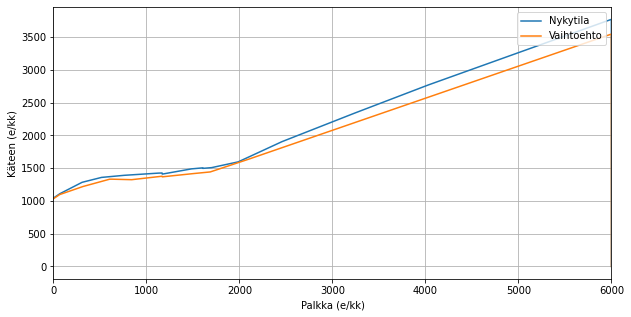

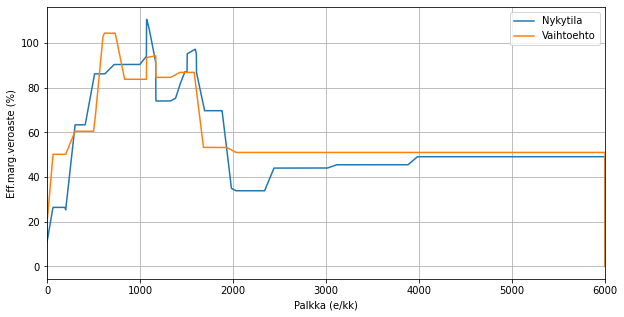

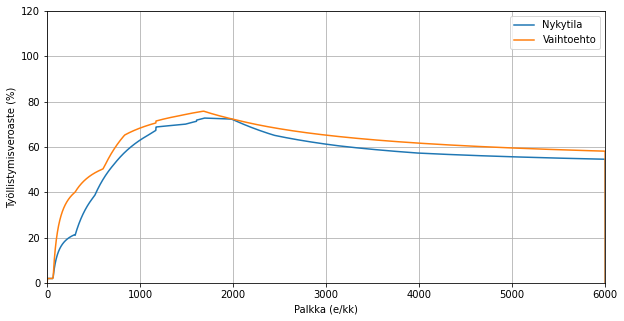

In [10]:
# ja lasketaan & plotataan tulokset
_,_,_=ben.laske_ja_plottaa(p,basenetto=basenetto,baseeff=baseeff,basetva=basetva)

# Kokoelma esimerkkitapauksia

KeyboardInterrupt: 

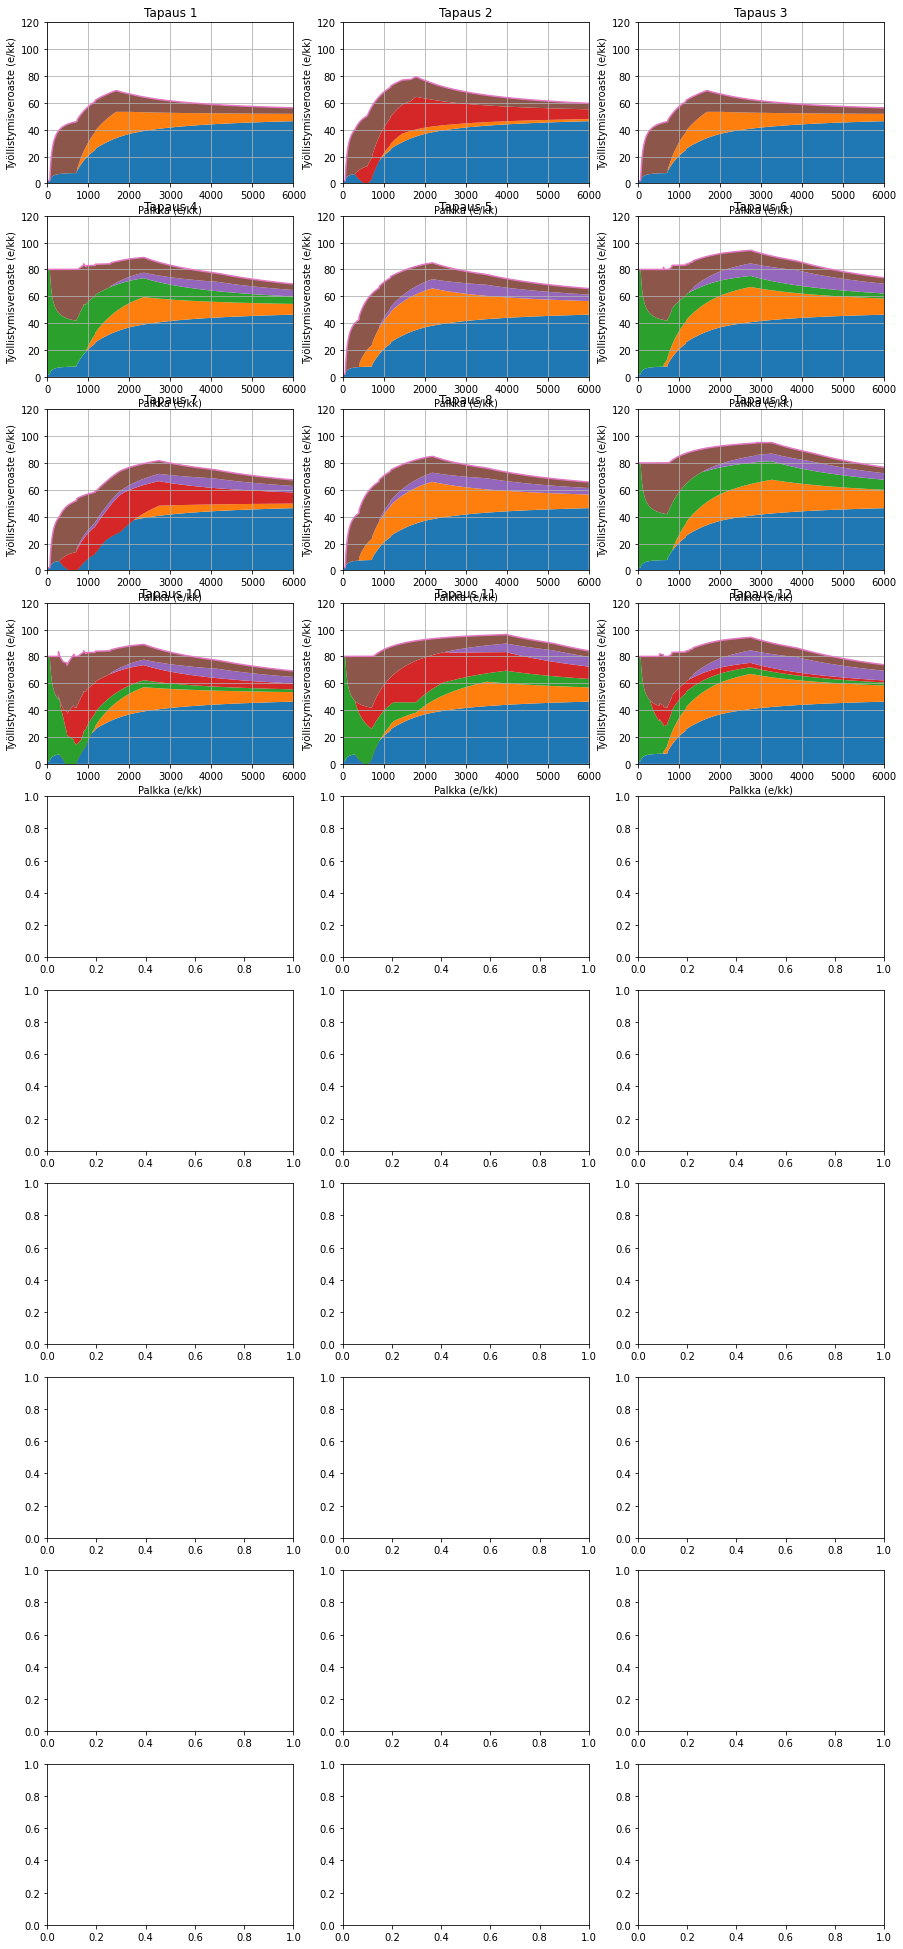

In [11]:
# tämän laskenta on aika hidasta
plt.rcParams['figure.figsize'] = [15, 35]
ben.laske_ja_plottaa_hila(type='tva')
plt.rcParams['figure.figsize'] = [10, 5]

# Kirjallisuus

[1] Viitamäki, H. Työnteon kannustimet - mitä jää käteen? VATT muistiot 50, https://vatt.fi/documents/2956369/3012213/muistio_50.pdf, 2015

[2] Kärkkäinen, O., Tervola, J. Talouspolitiikan vaikutukset tuloeroihin ja työllisyyteen 2015–2018, Valtioneuvoston selvitys- ja tutkimustoiminnan julkaisusarja 59/2018, http://julkaisut.valtioneuvosto.fi/handle/10024/161061, 2018